In [1]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_polymer, grow_polymer, \
     generate_N_polymers, expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" We can start a new Polymer object with a starting Monomer(angle) where angle is {0,1,2,3} for 0*90, 1*90, 2*90, 3*90 degrees

Here we start the chain with a monomer to the right
"""
first_monomer = Monomer(0)

polymer = Polymer((10,10), (5,5))
print(first_monomer.end_location)

None


In [3]:
print(polymer.chain_end)
print(polymer.chain_start)

(4, 5)
(5, 5)


In [4]:
polymer.add_monomer(3) # add monomer down
print(polymer.chain_end)

(4, 4)


In [5]:
"""
Since we dont want our Polymer to close we see that we get an arrow if we now
add further monomers that go to the left and up again
"""

polymer.add_monomer(2) # add monomer to the left
print(polymer.chain_end)
try:
    polymer.add_monomer(1) # add monomer up (should error out)
except:
    print('Could not add monomer')
print(polymer.chain_end)

(3, 4)
(3, 5)


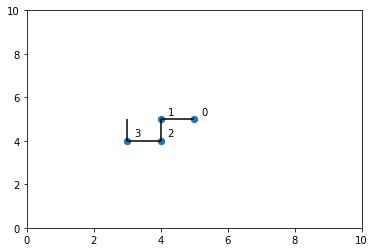

In [6]:
plot_polymer(polymer)

In [7]:
for monomer in polymer:
    print(monomer, "angle = {}".format(monomer.angle))

Monomer from (5, 5) to (4, 5) angle = 2
Monomer from (4, 5) to (4, 4) angle = 3
Monomer from (4, 4) to (3, 4) angle = 2
Monomer from (3, 4) to (3, 5) angle = 1


In [8]:
polymer1 = Polymer((10,10), (5,5))

In [9]:
from random import randint

random_angles = [randint(0,3) for i in range(10)]

for i in random_angles:
    polymer1.add_monomer(i)

Exception: Proposed monomer's end location already a node of polymer

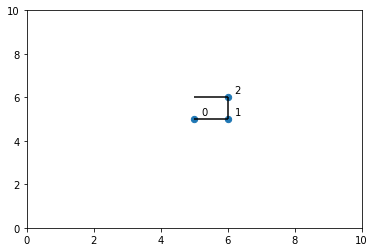

In [10]:
plot_polymer(polymer1)

In [11]:
m, polymer2 = grow_polymer((20,20), (10,10), 200)
m

The polymer grew to length 57


array([3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 3., 2., 1., 3., 2., 3., 3., 3., 1.,
       3., 3., 3., 3., 3., 2., 2., 3., 2., 3., 3., 1., 1., 2., 3., 2., 3.,
       3., 1., 3., 3., 3.])

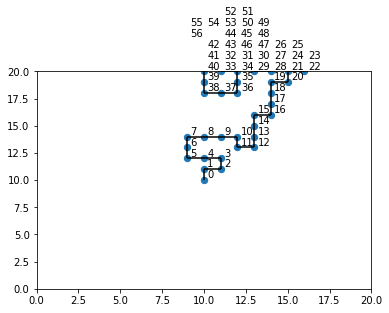

In [12]:
plot_polymer(polymer2)

In [13]:
polymer2.chain_length

57

In [14]:
"""
run test to check if behaviour is as expected for random polymers of length 1, 2, 3
"""
N = 1000
L = 2
end2end = np.zeros(N)
for i in range(N):
    test_m, testpoly = grow_polymer((10,10), (5,5), L)
    end2end[i] = np.sqrt(testpoly.distance_end_start())

plt.hist(end2end)
plt.savefig('Figures/end2endDistribution_L={}'.format(L))

"Distribution of end to end distances is as expected for these lengths"

AttributeError: 'Polymer' object has no attribute 'distance_end_start'

In [15]:
end_to_end, gyration, weights = generate_N_polymers(70, 10, (10,10), (5,5))
end_to_end_weighted_avg = expect_observ(end_to_end, weights)
end_to_end_err = error_observ(end_to_end, weights, 5)

In [16]:
polymer = Polymer((10,10), (5,5))
polymer.grow_polymer(40)

The polymer grew to length 33


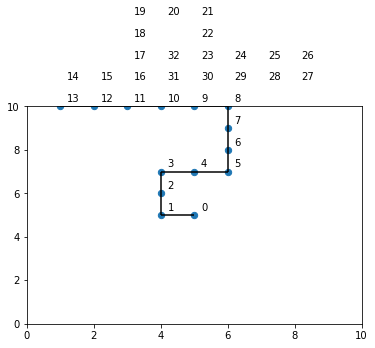

In [17]:
plot_polymer(polymer)

In [18]:
end, gyr = polymer.observables()

In [19]:
print(end)
print(gyr)

[ 1.  2.  5.  4.  5. 10. 17. 26. 25. 26. 29. 34. 41. 52. 45. 40. 53. 68.
 85. 82. 81. 64. 49. 50. 53. 58. 45. 40. 37. 36. 37. 50.]
[0.         0.25       0.44444444 0.875      1.04       1.36111111
 1.79591837 2.4375     3.30864198 3.73       4.04958678 4.44444444
 5.00591716 5.78061224 6.60444444 6.875      6.87197232 7.12654321
 7.6565097  8.47       9.07029478 9.58884298 9.6710775  9.49652778
 9.4368     9.53994083 9.84087791 9.98469388 9.88109394 9.64111111
 9.35275754 9.0859375 ]


In [20]:
dish = Dish((10,10), (5,5))


In [21]:
dish.generate_N_polymers(100, 30)

The polymer grew to length 21
The polymer grew to length 23
The polymer grew to length 22
The polymer grew to length 27
The polymer grew to length 25
The polymer grew to length 25
The polymer grew to length 15
The polymer grew to length 18
The polymer grew to length 18
The polymer grew to length 10
The polymer grew to length 15
The polymer grew to length 22
The polymer grew to length 23
The polymer grew to length 29
The polymer grew to length 24
The polymer grew to length 25
The polymer grew to length 23
The polymer grew to length 27
The polymer grew to length 24
The polymer grew to length 26
The polymer grew to length 17
The polymer grew to length 16
The polymer grew to length 21
The polymer grew to length 23
The polymer grew to length 29
The polymer grew to length 21
The polymer grew to length 26
The polymer grew to length 27
The polymer grew to length 19
The polymer grew to length 20


(array([[  1.,   4.,   9., ...,  41.,  50.,  61.],
        [  1.,   2.,   5., ..., 261., 274., 305.],
        [  1.,   2.,   1., ...,   5.,  10.,   9.],
        ...,
        [  1.,   2.,   5., ...,  61.,  52.,  45.],
        [  1.,   2.,   5., ..., 197., 196., 197.],
        [  1.,   2.,   5., ...,  65.,  82., 101.]]),
 array([[ 0.        ,  0.25      ,  0.66666667, ...,  8.21947874,
          8.32653061,  8.55648038],
        [ 0.        ,  0.25      ,  0.44444444, ..., 20.54869684,
         22.40561224, 24.1117717 ],
        [ 0.        ,  0.25      ,  0.44444444, ...,  7.35253772,
          7.17346939,  7.039239  ],
        ...,
        [ 0.        ,  0.25      ,  0.44444444, ..., 12.4691358 ,
         12.45918367, 12.22592152],
        [ 0.        ,  0.25      ,  0.44444444, ..., 16.09602195,
         17.32397959, 18.47800238],
        [ 0.        ,  0.25      ,  0.44444444, ...,  7.59396433,
          8.21938776,  9.09393579]]),
 array([[ 4.00000000e+00,  1.20000000e+01,  3.600000

In [22]:
dish.polymers

In [23]:
weights = dish.weights
observ = dish.end_to_end


In [24]:

end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

In [25]:
def scaling_law(L, dims):
    ls = np.arange(L)+1
    exponent = 2*3/4

    return ls**exponent

In [26]:
exp_behaviour = scaling_law(30, 2)

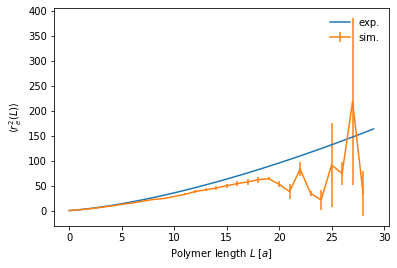

In [27]:
plt.plot(np.arange(30),exp_behaviour, label=r'exp.')
plt.errorbar(np.arange(29), end_to_end_weighted_avg, yerr=end_to_end_err, label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")
plt.savefig('Figures/end2endplot')

In [28]:
dish = Dish((10,10),(5,5))
dish.PERM(10, 2, 100)
print(len(dish.polymers))

53


In [29]:
for polymer in dish.polymers:
    print(polymer.chain_length)

54
22
25
16
23
13
18
18
45
47
43
76
21
58
60
41
33
38
69
64
36
47
45
73
47
67
62
100
85
87
50
76
53
53
47
68
51
63
100
82
65
67
100
100
100
91
100
100
100
100
100
100
100


In [30]:
weights = dish.weights
observ = dish.end_to_end

In [31]:
end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

In [32]:
from scipy.optimize import curve_fit as cv

In [33]:
def fun(x, a):
    return a*x**(3/2)

In [34]:
cutoff = 70
cf = cutoff

In [35]:
x = np.arange(cf)
y = end_to_end_weighted_avg[0:cf]

In [36]:
[ i for i in np.arange(len(end_to_end_weighted_avg)) if np.isnan(end_to_end_weighted_avg[i])]

[]

In [37]:
copt, ccov = cv(fun, x, y)

In [38]:

exp_behaviour = fun(x, copt) 

In [39]:
yerr = end_to_end_err[0:cf]

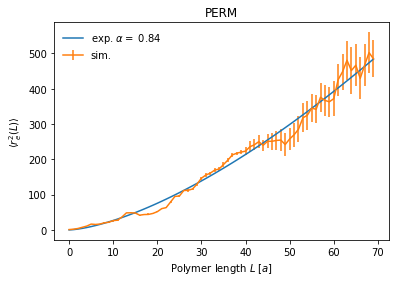

In [45]:
plt.plot(x, fun(x, copt), label=r'exp. $\alpha=$ '+'{:.2f}'.format(copt[0]))
plt.errorbar(x, end_to_end_weighted_avg[0:cf], yerr=end_to_end_err[0:cf], label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")
plt.title("PERM")
plt.savefig('Figures/end2endplotperm')

In [3]:
dish = Dish((10,10),(5,5))

In [4]:
dish.find_N_polymer(100, 30)

In [5]:
len(dish.polymers)

121

In [6]:
dish.analyse_polymers(30)

ValueError: could not broadcast input array from shape (18,) into shape (29,)

In [6]:
p = dish.polymers[1]

In [12]:
len(p.)


30